In [1]:
%matplotlib inline

In [2]:
import os
import json
import re

In [5]:
bdir = "./jobs/"
cnts = [ json.loads(open(bdir+fn, "r", encoding="utf8").read()) for fn in os.listdir(bdir)]

# 初步整理 pay_type

In [11]:
print (cnts[0]['pay_type'])

依學經歷、證照核薪


In [12]:
import collections

In [53]:
def count_pay_avg(pay_type):
    if re.search(u"[時|月|日]薪", pay_type):
        pay = pay_type.replace("時薪", '').replace("月薪", '').replace("日薪", '')
        (pay_up, pay_down) = pay.strip().split(" - ")
        pay_avg = (int(pay_up) + int(pay_down) )/2
        return pay_avg
    else:
        return pay_type

In [54]:
pay_types = collections.Counter([ count_pay_avg(x['pay_type']) for x in cnts])

In [55]:
import pandas as pd

In [56]:
pay_type_df = pd.DataFrame(pay_types.most_common(1000))

In [59]:
pay_type_df.columns = ['pay_mount', 'counter']

In [71]:
pay_type_df

,pay_mount,counter
0,依學經歷、證照核薪,5366
1,22000,491
2,140,416
3,30000,383
4,26000,345
5,27500,327
6,25000,304
7,35000,253
8,24000,247
9,28000,231


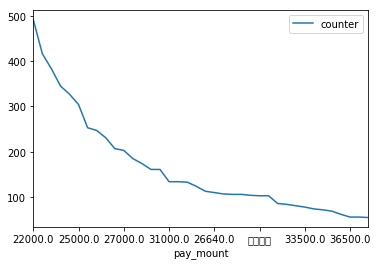

In [73]:
pay_type_df[(pay_type_df.counter < 500) & 
            (pay_type_df.counter > 50)].plot(x='pay_mount', y='counter')

# 準備 job_desc 的資料(x)

In [74]:
desc = [ x['job_desc'] for x in cnts]

In [75]:
print (desc[0])

徵:職業大貨車司機(自備貨車10.5噸、15噸、17噸)，工作內容:送貨與隨車助手，意者親洽或電洽。


In [78]:
import jieba

In [91]:
def token(txt):
    wrds = []
    for wrd in jieba.cut(txt):
        if re.match(u"[\u4e00-\u9fa5]+", wrd): #中文字
            wrds.append(wrd)
        elif re.match("\d+", wrd): # 數字
            wrds.append(wrd)
        elif re.match("\w+", wrd): # 英文字
            wrds.append(wrd)
        else:
            pass
    return wrds

In [92]:
print ( token(desc[0]) )

['徵', '職業', '大貨車', '司機', '自備', '貨車', '10.5', '噸', '15', '噸', '17', '噸', '工作', '內容', '送貨', '與', '隨車', '助手', '意者', '親洽', '或', '電洽']


## 使用 TFIDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf = TfidfVectorizer(lowercase=False, 
                        sublinear_tf = True, 
                        max_df = 0.85, 
                        analyzer=lambda x: x, 
                        token_pattern=None) 

In [96]:
ans = tfidf.fit_transform([token(x) for x in desc])

In [ ]:
ans.getasn.

## install jieba

In [77]:
!pip install jieba

  Using cached https://files.pythonhosted.org/packages/71/46/c6f9179f73b818d5827202ad1c4a94e371a29473b7f043b736b4dab6b8cd/jieba-0.39.zip
  Running setup.py bdist_wheel for jieba: started
  Running setup.py bdist_wheel for jieba: finished with status 'done'
  Stored in directory: C:\Users\ACER T110\AppData\Local\pip\Cache\wheels\c9\c7\63\a9ec0322ccc7c365fd51e475942a82395807186e94f0522243
Successfully built jieba
